<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/Cricket_Scoreboard/blob/main/ML%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

(a) Load the data into memory. Make an appropriate X matrix and y vector.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = '/content/drive/MyDrive/lung_cancer_dataset.csv'
df = pd.read_csv(data)
df = df.dropna()
# Preview the data
print(df.head())


   patient_id  age  gender  pack_years radon_exposure asbestos_exposure  \
0      100000   69    Male   66.025244           High                No   
1      100001   32  Female   12.780800           High                No   
3      100003   78  Female   44.065232            Low                No   
5      100005  100    Male   81.180545            Low                No   
6      100006   92    Male   18.156752           High                No   

  secondhand_smoke_exposure copd_diagnosis alcohol_consumption family_history  \
0                        No            Yes            Moderate             No   
1                       Yes            Yes            Moderate            Yes   
3                       Yes             No            Moderate             No   
5                       Yes             No            Moderate            Yes   
6                       Yes            Yes            Moderate            Yes   

  lung_cancer  
0          No  
1         Yes  
3         Yes 

In [8]:
# Replace 'LUNG_CANCER' with the actual target column name if different
target = 'lung_cancer'

X = df.drop(columns=[target])
y = df[target]


Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

Here’s a neatly formatted version of the explanation you can put directly into Google Colab as a text cell (Markdown):

---

## ✅ Data Preprocessing Pipeline Explanation

### 1️⃣ Identify Feature Types

* **Numerical features**:

  * `['age', 'pack_years']`
* **Nominal Categorical Features** (no order):

  * `['gender', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'family_history']`
* **Ordinal Categorical Features** (ordered categories):

  * `['radon_exposure', 'alcohol_consumption']`

---

### 2️⃣ Define Transformers

* **Numerical Data**:

  ```python
  StandardScaler()
  ```

  → Scales data to mean = 0, std = 1.

* **Nominal Categorical Data**:

  ```python
  OneHotEncoder(handle_unknown='ignore')
  ```

  → Converts categories to binary columns (0 or 1).

* **Ordinal Categorical Data**:

  ```python
  OrdinalEncoder(categories=[['Low', 'Medium', 'High'], ['Light', 'Moderate', 'Heavy']])
  ```

  → Maps categories to numbers based on order.

---

### 3️⃣ Combine with ColumnTransformer

```python
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat_nom', OneHotEncoder(handle_unknown='ignore'), categorical_features_nominal),
        ('cat_ord', OrdinalEncoder(categories=[['Low', 'Medium', 'High'], ['Light', 'Moderate', 'Heavy']]), categorical_features_ordinal)
    ],
    remainder='passthrough'
)
```

* Applies proper transformations to each feature group.
* `remainder='passthrough'` keeps other columns (e.g., patient\_id) as-is.

---

### 4️⃣ Apply Preprocessing

```python
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
```

* `fit_transform`: Learns scaling from training data.
* `transform`: Applies the same transformation to test data.

---

### 5️⃣ Final Output

```python
X_train_scaled = X_train_processed
X_test_scaled = X_test_processed
```

These processed datasets are ready for model training.

---

💡 **Note:**
All numerical features are already scaled by `StandardScaler`. No need for additional scaling.

---

Would you like me to generate this formatted as a ready-to-use Markdown block you can copy-paste directly into Colab?


Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical features
categorical_features_nominal = ['gender', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'family_history']
categorical_features_ordinal = ['radon_exposure', 'alcohol_consumption']
numerical_features = ['age', 'pack_years']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer_nominal = OneHotEncoder(handle_unknown='ignore')
categorical_transformer_ordinal = OrdinalEncoder(categories=[['Low', 'Medium', 'High'], ['Light', 'Moderate', 'Heavy']])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat_nom', categorical_transformer_nominal, categorical_features_nominal),
        ('cat_ord', categorical_transformer_ordinal, categorical_features_ordinal)
    ],
    remainder='passthrough' # Keep other columns (like patient_id) - we can drop this later if not needed for modeling
)

# Create a pipeline that first preprocesses the data and then scales it (although StandardScaler is part of preprocessor here)
# A simpler approach is to just use the preprocessor to transform the data directly
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Now you can use X_train_processed and X_test_processed in your model training
# For this specific case of scaling, the preprocessor already includes StandardScaler for numerical features,
# so X_train_scaled and X_test_scaled are essentially X_train_processed and X_test_processed
X_train_scaled = X_train_processed
X_test_scaled = X_test_processed

Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Regularization parameters (lambda)
lambdas = [0, 0.1, 1, 10, 100, 1000]
C_values = [1/l if l > 0 else 1e12 for l in lambdas]  # Avoid division by zero

# Storage
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
weight_norms = []
weights_list = []

for C in C_values:
    # Initialize Logistic Regression with L2 regularization
    model = LogisticRegression(
        penalty='l2', C=C, solver='liblinear', max_iter=1000
    )

    # Fit model
    model.fit(X_train_scaled, y_train)

    # Predictions and probabilities
    y_train_prob = model.predict_proba(X_train_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Cross-entropy (log loss)
    train_loss = log_loss(y_train, y_train_prob)
    test_loss = log_loss(y_test, y_test_prob)

    # Weight norms
    weight_norm = np.linalg.norm(model.coef_)

    # Store metrics
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    weight_norms.append(weight_norm)
    weights_list.append(model.coef_.flatten())

# Convert weights_list to a numpy array for easy plotting
weights_array = np.array(weights_list)


How the training and test cross-entropy losses change as you vary the regularization parameter λ.

Typically:

Small λ → low regularization → possible overfitting → low train loss, higher test loss.

Large λ → strong regularization → underfitting → higher train and test losses.

The log scale on λ helps visualize trends when λ spans multiple orders of magnitude.

Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

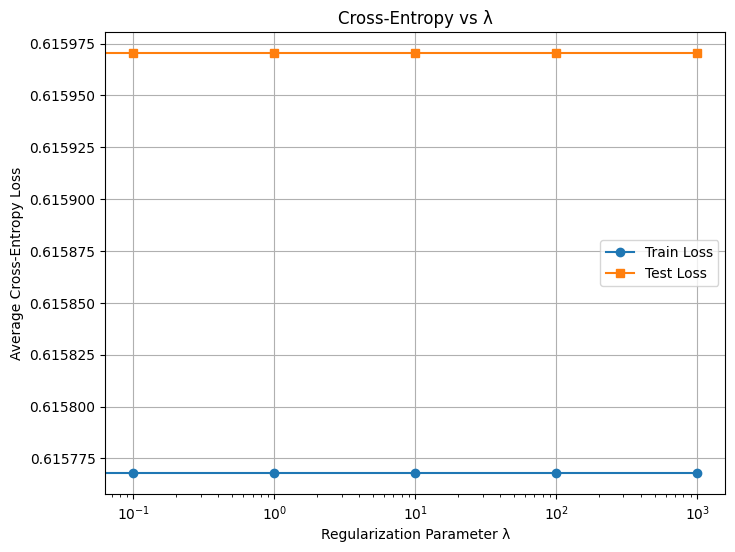

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel('Regularization Parameter λ')
plt.ylabel('Average Cross-Entropy Loss')
plt.title('Cross-Entropy vs λ')
plt.legend()
plt.grid(True)
plt.show()


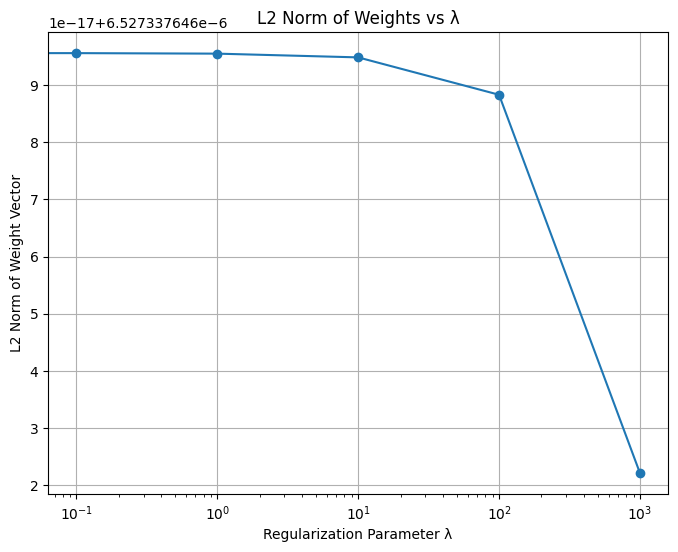

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter λ')
plt.ylabel('L2 Norm of Weight Vector')
plt.title('L2 Norm of Weights vs λ')
plt.grid(True)
plt.show()


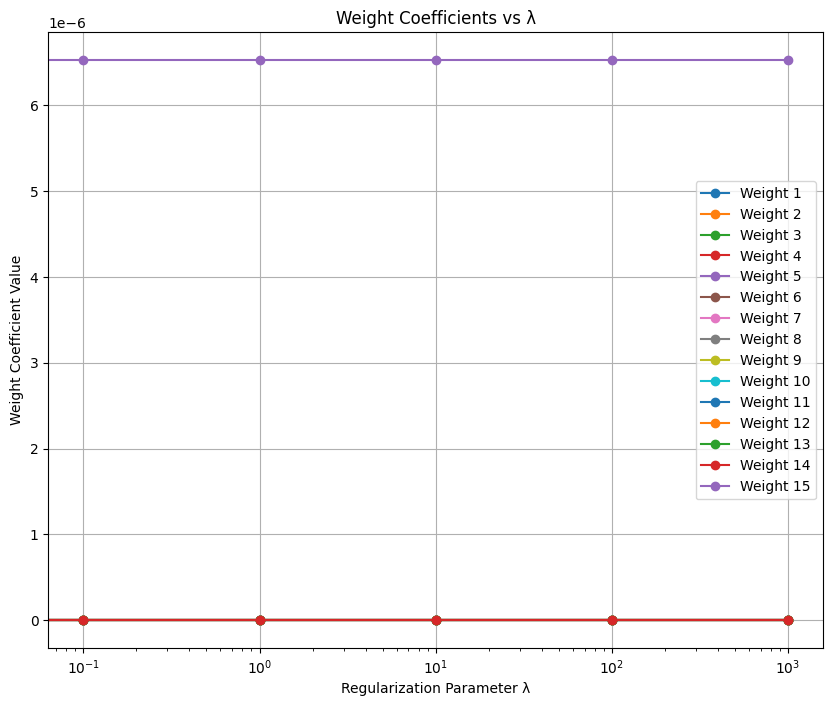

In [16]:
plt.figure(figsize=(10, 8))
for i in range(weights_array.shape[1]):
    plt.plot(lambdas, weights_array[:, i], marker='o', label=f'Weight {i+1}')

plt.xscale('log')
plt.xlabel('Regularization Parameter λ')
plt.ylabel('Weight Coefficient Value')
plt.title('Weight Coefficients vs λ')
plt.legend()
plt.grid(True)
plt.show()


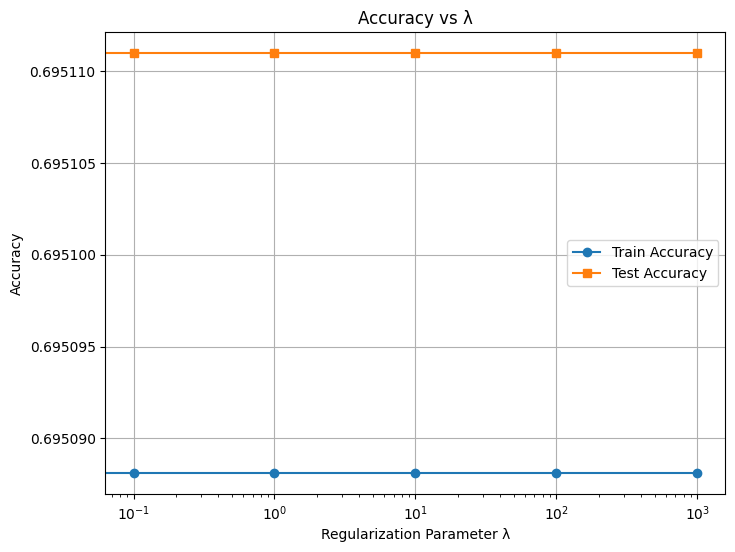

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(lambdas, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_accuracies, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter λ')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ')
plt.legend()
plt.grid(True)
plt.show()


Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on

2

the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).

In [18]:
import numpy as np

def apply_gaussian_basis(X, sigma):
    n_samples, n_features = X.shape
    n_basis = 5

    # Define means of the basis functions
    mus = np.linspace(-10, 10, n_basis)  # [ -10, -5, 0, 5, 10 ]

    # Container for transformed features
    X_basis = np.zeros((n_samples, n_features * n_basis))

    for i in range(n_features):
        for j, mu in enumerate(mus):
            # Apply Gaussian basis function
            X_basis[:, i * n_basis + j] = np.exp(- ((X[:, i] - mu) ** 2) / (2 * sigma ** 2))

    return X_basis


Processing σ = 0.1
Processing σ = 0.5
Processing σ = 1
Processing σ = 5
Processing σ = 10


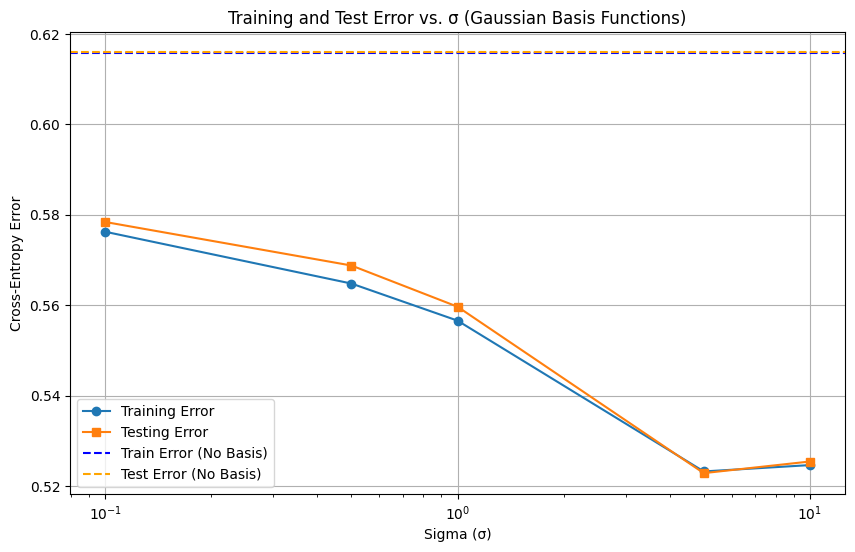

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

sigma_values = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []

# Use the training and testing losses for lambda = 0 from cell 93GppTEDUIBS
train_error_no_basis = train_losses[0]
test_error_no_basis = test_losses[0]

for sigma in sigma_values:
    print(f"Processing σ = {sigma}")

    # Apply Gaussian basis transformation
    X_train_basis = apply_gaussian_basis(X_train_scaled, sigma)
    X_test_basis = apply_gaussian_basis(X_test_scaled, sigma)

    # Train Logistic Regression with negligible regularization (C very large)
    model = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=1000)
    model.fit(X_train_basis, y_train)

    # Predictions (probabilities)
    y_train_pred = model.predict_proba(X_train_basis)
    y_test_pred = model.predict_proba(X_test_basis)

    # Compute Cross-Entropy (Log Loss)
    train_loss = log_loss(y_train, y_train_pred)
    test_loss = log_loss(y_test, y_test_pred)

    train_errors.append(train_loss)
    test_errors.append(test_loss)


# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, train_errors, marker='o', label='Training Error')
plt.plot(sigma_values, test_errors, marker='s', label='Testing Error')

# Add horizontal lines for the no-basis-function errors
plt.axhline(y=train_error_no_basis, color='blue', linestyle='--', label='Train Error (No Basis)')
plt.axhline(y=test_error_no_basis, color='orange', linestyle='--', label='Test Error (No Basis)')

plt.xscale('log')
plt.xlabel('Sigma (σ)')
plt.ylabel('Cross-Entropy Error')
plt.title('Training and Test Error vs. σ (Gaussian Basis Functions)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Define σ values and λ values
sigma_values = [0.1, 0.5, 1, 5, 10]
lambda_values = [0, 0.1, 1, 10, 100, 1000, 10000]

# Compute means for Gaussian basis functions (fixed for all σ)
num_basis_per_feature = 5
means = np.linspace(-10, 10, num_basis_per_feature)


# Identify categorical and numerical features
categorical_features_nominal = ['gender', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'family_history']
categorical_features_ordinal = ['radon_exposure', 'alcohol_consumption']
numerical_features = ['age', 'pack_years']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer_nominal = OneHotEncoder(handle_unknown='ignore')
categorical_transformer_ordinal = OrdinalEncoder(categories=[['Low', 'Medium', 'High'], ['Light', 'Moderate', 'Heavy']])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat_nom', categorical_transformer_nominal, categorical_features_nominal),
        ('cat_ord', categorical_transformer_ordinal, categorical_features_ordinal)
    ],
    remainder='passthrough' # Keep other columns (like patient_id) - we can drop this later if not needed for modeling
)

# Apply preprocessing to the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Prepare basis function transformation
def gaussian_basis(X, sigma):
    n_samples, n_features = X.shape
    basis = []
    for i in range(n_features):
        for m in means:
            basis.append(np.exp(-((X[:, i] - m) ** 2) / (2 * sigma ** 2)))
    return np.array(basis).T  # Shape: (n_samples, n_features * num_basis_per_feature)

In [26]:
# Baseline logistic regression without basis functions
baseline_model = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)
y_train_pred_baseline = baseline_model.predict_proba(X_train_scaled)
y_test_pred_baseline = baseline_model.predict_proba(X_test_scaled)
train_error_no_basis = log_loss(y_train, y_train_pred_baseline)
test_error_no_basis = log_loss(y_test, y_test_pred_baseline)


In [27]:
results = {
    'train_loss': [],
    'test_loss': [],
    'weight_norm': [],
    'basis_weight_norm': {sigma: [] for sigma in sigma_values}
}

for sigma in sigma_values:
    print(f'Processing sigma = {sigma}')

    # Generate basis-transformed data
    X_train_basis = gaussian_basis(X_train_scaled, sigma)
    X_test_basis = gaussian_basis(X_test_scaled, sigma)

    for lam in lambda_values:
        C = 1 / lam if lam != 0 else 1e12  # Large C to approximate no regularization

        model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
        model.fit(X_train_basis, y_train)

        y_train_pred = model.predict_proba(X_train_basis)
        y_test_pred = model.predict_proba(X_test_basis)

        train_loss = log_loss(y_train, y_train_pred)
        test_loss = log_loss(y_test, y_test_pred)
        weight_norm = np.linalg.norm(model.coef_)

        # Calculate weight norm for this σ
        results['train_loss'].append((sigma, lam, train_loss))
        results['test_loss'].append((sigma, lam, test_loss))
        results['weight_norm'].append((sigma, lam, weight_norm))
        results['basis_weight_norm'][sigma].append(weight_norm)


Processing sigma = 0.1
Processing sigma = 0.5
Processing sigma = 1
Processing sigma = 5
Processing sigma = 10


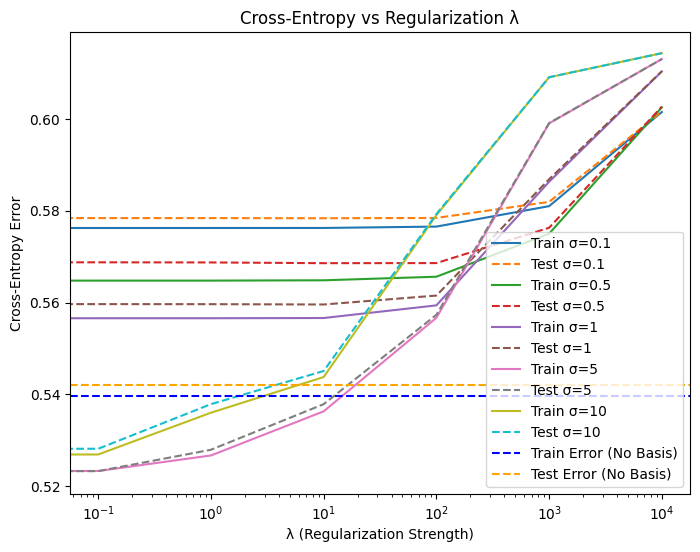

In [28]:
plt.figure(figsize=(8,6))

for sigma in sigma_values:
    train_losses = [t[2] for t in results['train_loss'] if t[0]==sigma]
    test_losses = [t[2] for t in results['test_loss'] if t[0]==sigma]
    plt.plot(lambda_values, train_losses, label=f'Train σ={sigma}')
    plt.plot(lambda_values, test_losses, '--', label=f'Test σ={sigma}')

plt.axhline(y=train_error_no_basis, color='blue', linestyle='--', label='Train Error (No Basis)')
plt.axhline(y=test_error_no_basis, color='orange', linestyle='--', label='Test Error (No Basis)')
plt.xscale('log')
plt.xlabel('λ (Regularization Strength)')
plt.ylabel('Cross-Entropy Error')
plt.title('Cross-Entropy vs Regularization λ')
plt.legend()
plt.show()


###  Designing Gaussian Basis Functions That Capture Input Relationships

In the standard setup, we independently apply Gaussian basis functions to each input feature separately. That means for each feature dimension $x_i$, we generate basis functions of the form:

$$
\phi_{m}^{(i)}(x_i) = \exp\left(-\frac{(x_i - \mu_m)^2}{2\sigma^2}\right)
$$

where $\mu_m$ are fixed means across a grid and $\sigma$ controls the width of each basis function.

---

####  What We Would Do to Capture Relationships Between Inputs

Instead of applying Gaussian basis functions to individual input features separately, we could define **multivariate Gaussian basis functions that depend jointly on multiple input variables**. In other words, for a 2D input vector $\mathbf{x} = [x_1, x_2]^\top$, we could define basis functions like:

$$
\phi_m(\mathbf{x}) = \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_m)^\top \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu}_m) \right)
$$

where:

* $\boldsymbol{\mu}_m$ is a center in the multi-dimensional input space.
* $\Sigma$ is a covariance matrix that controls the shape of the basis function.

This allows the basis functions to capture correlations and interactions between different input variables (e.g., $x_1$ and $x_2$ together influence the output in a non-additive way).

We would place the centers $\boldsymbol{\mu}_m$ on a grid across the joint input space, and possibly choose an appropriate covariance matrix $\Sigma$ to control anisotropy (if some dimensions are more important than others).

---

####  Impact on Bias-Variance Trade-Off

| Factor                       | Effect                                                                                                                                                                                                                            |
| ---------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Bias**                     | Multivariate basis functions are more flexible and expressive, allowing the model to represent complex relationships between inputs (reducing bias).                                                                              |
| **Variance**                 | More expressive models with many joint basis functions (especially in high dimensions) are prone to overfitting, leading to increased variance. More parameters mean the model can "memorize" the training data too well.         |
| **Computational Complexity** | The number of basis functions grows exponentially with the number of input dimensions (curse of dimensionality). This increases computational cost and makes the model harder to train, especially without strong regularization. |
| **Regularization Role**      | Proper regularization (e.g., large λ) becomes critical to prevent overfitting and keep the variance in check while still benefiting from the reduced bias.                                                                        |

---

###  Conclusion

* Designing Gaussian basis functions that capture relationships between inputs increases model expressiveness and reduces bias.
* However, it also increases the risk of overfitting due to high variance and computational cost.
* To use this effectively in practice, careful design of basis centers, choice of σ and Σ, and regularization is essential to balance the bias-variance trade-off.

Let me know if you'd like to see a practical code example of multivariate Gaussian basis functions!



**Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own)**


If we want Gaussian basis functions to capture relationships between inputs (not just each input separately), you need to use multidimensional Gaussians. That means instead of having basis functions centered on single features, you define them in the full input space, where each basis function depends on multiple inputs together.

1. What changes?

Each basis function now has a center vector (for all features) and possibly a covariance matrix to control its shape in multiple dimensions.
You will need many more basis functions to cover the input space properly.
2.Impact on bias-variance:

If we want Gaussian basis functions to capture relationships between inputs (not just each input separately), you need to use multidimensional Gaussians. That means instead of having basis functions centered on single features, you define them in the full input space, where each basis function depends on multiple inputs together.

But it increases variance (risk of overfitting) because the model becomes more flexible and needs more data to fit reliably.

Regularization becomes even more important to control complexity.

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score


2. Experiment on insurance dataset to demonstrate the Linear Regression and its versions, along with complete data preprocessing steps.

In [30]:
data = '/content/drive/MyDrive/StudentPerformanceFactors.csv'
df = pd.read_csv(data)
df = df.dropna()
# Preview the data
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [33]:
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [34]:
X = df.drop(['Exam_Score', 'Motivation_Level'], axis=1)
y_regression = df['Exam_Score']              # Linear Regression Target
y_classification = df['Motivation_Level']   # Logistic Regression Target

# Train/test split
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)
_, _, y_clf_train, y_clf_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ----- Linear Regression -----
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_reg_train)

y_reg_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")

# ----- Logistic Regression -----
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_clf_train)
y_clf_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_clf_test, y_clf_pred)
report = classification_report(y_clf_test, y_clf_pred)

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Linear Regression Mean Squared Error: 5.21
Logistic Regression Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       275
           1       0.00      0.00      0.00       357
           2       0.50      1.00      0.67       644

    accuracy                           0.50      1276
   macro avg       0.17      0.33      0.22      1276
weighted avg       0.25      0.50      0.34      1276



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


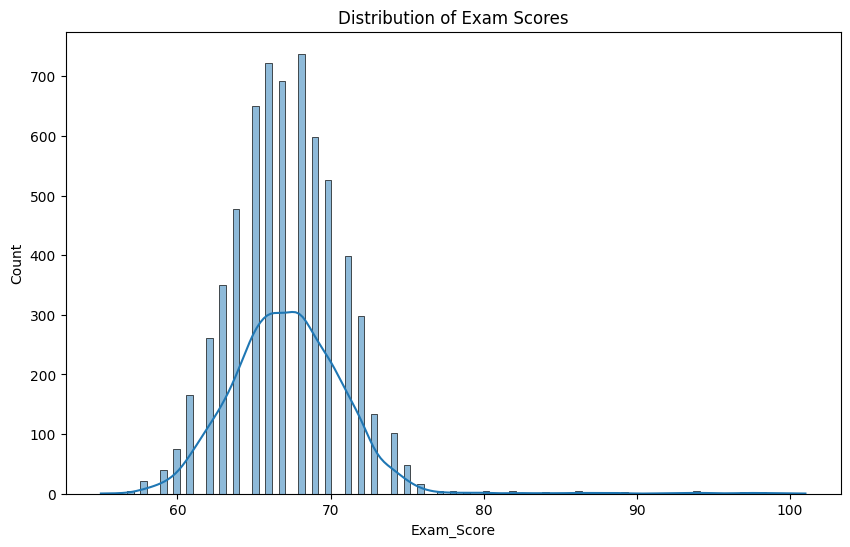

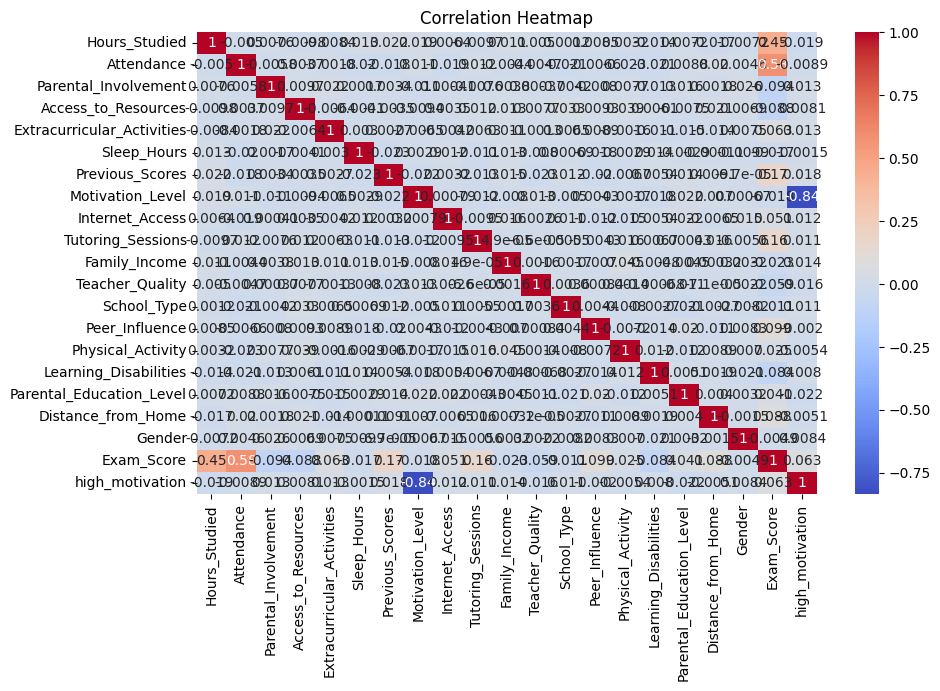

Linear Regression Mean Squared Error: 5.21
Root Mean Squared Error: 2.28
R-squared: 0.66


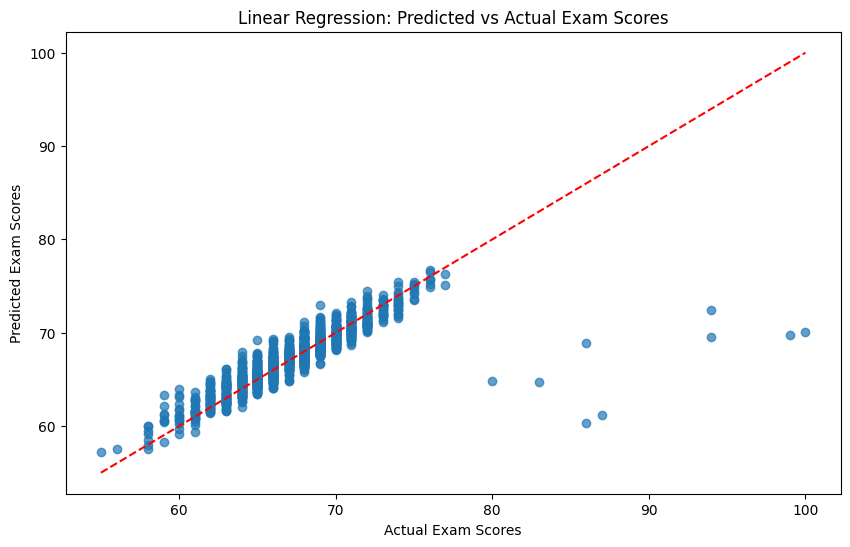

Logistic Regression Accuracy: 0.78
Confusion Matrix:
[[1001    0]
 [ 275    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1001
           1       0.00      0.00      0.00       275

    accuracy                           0.78      1276
   macro avg       0.39      0.50      0.44      1276
weighted avg       0.62      0.78      0.69      1276



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


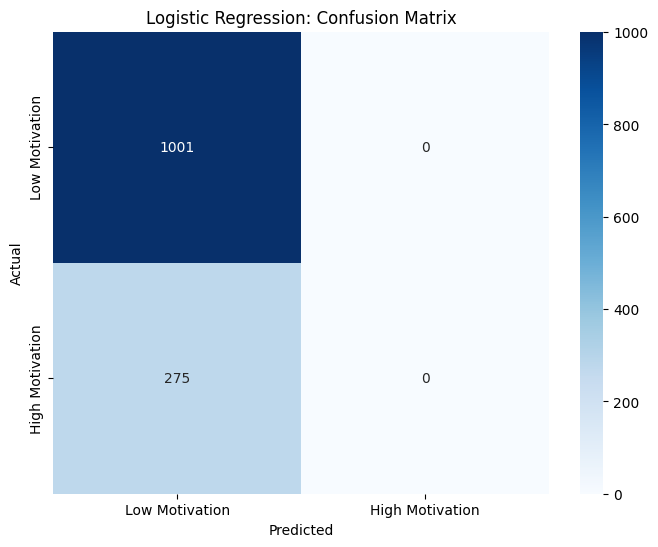

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load dataset
data = '/content/drive/MyDrive/StudentPerformanceFactors.csv'
df = pd.read_csv(data).dropna()

# Create the binary target for logistic regression before encoding
df['high_motivation'] = (df['Motivation_Level'] == 'High').astype(int)

# Encode categorical variables
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# ----- Linear Regression: Exam_Score -----
# Plot distribution of Exam_Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Features and target
X = df.drop(['Exam_Score', 'Motivation_Level', 'high_motivation'], axis=1)
y = df['Exam_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

# Predict
y_pred = lin_model.predict(X_test_scaled)

# Evaluate regression
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Regression plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual Exam Scores')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.show()

# ----- Logistic Regression: High vs Low Motivation -----
# Use the pre-defined binary target
X = df.drop(['Exam_Score', 'Motivation_Level', 'high_motivation'], axis=1)
y = df['high_motivation']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predict
y_pred = log_model.predict(X_test_scaled)

# Evaluate classification
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Confusion Matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Motivation', 'High Motivation'],
            yticklabels=['Low Motivation', 'High Motivation'])
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()